# Lab - 1

Name: Purusharth Malik

Registration No.: 2348542

### Represent qubit state vector in matrix notation

We will create 2 vectors, the plus vector and a random vector.

In [45]:
from qiskit_aer import AerSimulator
from qiskit import transpile, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

# Defining the + quantum state vector
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
state_vector = Statevector([[alpha], [beta]])

# Defining a random vector
random_vector = Statevector([[1/4], [-4/7]])

print("+ state vector:")
display(state_vector.draw('latex'))
display(state_vector.draw('text'))
print("Random state vector:")
display(random_vector.draw('latex'))
display(random_vector.draw('text'))

+ state vector:


<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

Random state vector:


<IPython.core.display.Latex object>

[ 0.25      +0.j,-0.57142857+0.j]

### Define and display state vectors and check their validity

For any quantum state to be valid, the probability of measuring all the states should sum upto 1. 

The probabilites can be calculated using Born rule.

In [39]:
# Checking the validity of the state vector
data = state_vector.data
norm = data[0]**2 + data[1]**2
print("Norm of the + state vector:", norm)

if np.isclose(norm, 1):
    print("The qubit state is valid.")
else:
    print("The qubit state is invalid.")
    
data = random_vector.data
norm = data[0]**2 + data[1]**2
print("\nNorm of then random vector:", norm)

if np.isclose(norm, 1):
    print("The qubit state is valid.")
else:
    print("The qubit state is invalid.")

Norm of the + state vector: (0.9999999999999998+0j)
The qubit state is valid.

Norm of then random vector: (0.38903061224489793+0j)
The qubit state is invalid.


In [36]:
# Another way to check the validity
state_vector.is_valid(), random_vector.is_valid()

(True, False)

### Simulate measurements and visualise the result

Here, we will create a single qubit quantum circuit and initialize it with the `+` quantum state vector.

Then, we will perform measurement 1024 times and visualize the results.

        ┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement results: {'1': 510, '0': 514}


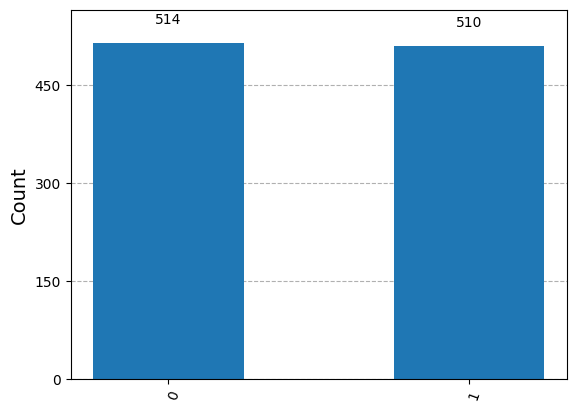

In [59]:
# Creating a quantum circuit
qc = QuantumCircuit(1)
# Initializing the qubit with the state vector
qc.initialize(state_vector, 0)

# Simulating measurement
qc.measure_all()

# Use the Qiskit Aer simulator to simulate the measurement results
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
print(compiled_circuit)
results = simulator.run(compiled_circuit).result()
counts = results.get_counts()

# Visualize the measurement results
print("Measurement results:", counts)
plot_histogram(counts)

# End